In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_dir = '/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/'

In [2]:
LICOdata = pd.read_csv(data_dir + 'LICODATADALevel.csv')

In [3]:
toronto_das = LICOdata[LICOdata['COL4'] == 'Toronto']

In [4]:
len(toronto_das)

3703

In [55]:
carless = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/GTAWithVarsForMaps/GTAWithVarsForMaps.shp')
employ = pd.read_csv(data_dir + 'DA employment counts/DA_EMP_2016.csv')
travel_diff = gpd.read_file(data_dir + 'results/travel_time_diff/travel_time_diff_2.shp')
clinics_gdf = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/clinic_shp/clean_clinics_v3.shp')
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
DA_income = pd.read_csv(data_dir + 'census_data/DA_income.csv')

In [56]:
carless['DAUID'] = carless['DAUID'].astype(int)

In [57]:
carless = carless[carless['DAUID'].isin(toronto_das['COL0'])]

In [58]:
carless = carless.merge(DA_income, left_on='DAUID', right_on='GeoUID')

In [59]:
carless['PCTCarless'] = carless['PCTCarless'] * 0.01

In [60]:
carless['pop_carless'] = carless['PCTCarless'] * carless['Population']

In [61]:
carless = carless.merge(travel_diff, left_on='DAUID', right_on='fromId')

In [62]:
carless.drop_duplicates('DAUID')['pop_carless'].sum()

657335.5682258331

In [63]:
NIA = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/neighbourhood-improvement-areas-wgs84/NEIGHBOURHOOD_IMPROVEMENT_AREA_WGS84.shp')
NIA.to_crs(epsg='4326', inplace=True)

## Threshold 20 Minutes

In [64]:
carless['2019_u20'] = carless['tt_2019'] < 20
carless['2020_o20'] = carless['tt_2020'] >= 20

In [65]:
carless['thres'] = (carless['2019_u20'] == True) & (carless['2020_o20'] == True)

In [66]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

In [67]:
carless.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

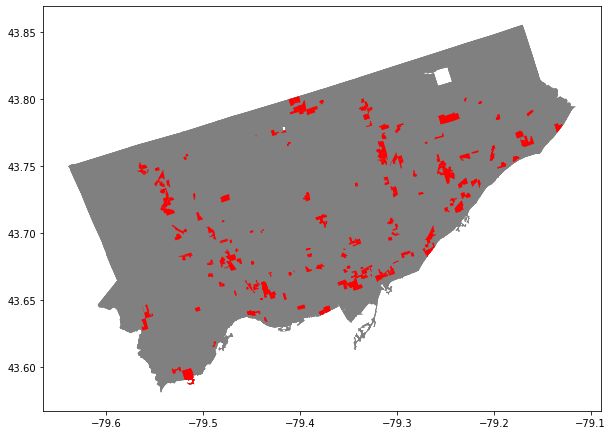

In [68]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [69]:
len(carless[carless['thres'] == True]['DAUID'].unique())

256

In [70]:
np.nansum(carless[carless['thres'] == True]['pop_carless'].unique())

49090.297689644605

In [71]:
carless[carless['thres'] == True]['diff'].describe()

count    421.000000
mean       2.332542
std        1.401907
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        7.000000
Name: diff, dtype: float64

In [72]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')

In [73]:
carless[carless['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

31440.0

In [40]:
len(gpd.overlay(carless[carless['thres']==True], NIA, how='intersection')['DAUID'].unique())

70

In [570]:
carless = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/GTAWithVarsForMaps/GTAWithVarsForMaps.shp')
employ = pd.read_csv(data_dir + 'DA employment counts/DA_EMP_2016.csv')
travel_diff = gpd.read_file(data_dir + 'results/travel_time_diff/travel_time_diff_2.shp')
clinics_gdf = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/clinic_shp/clean_clinics_v3.shp')
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
DA_income = pd.read_csv(data_dir + 'census_data/DA_income.csv')

## Threshold 30 Minutes

In [77]:
carless['2019_u20'] = carless['tt_2019'] < 30
carless['2020_o20'] = carless['tt_2020'] >= 30

In [78]:
carless['thres'] = (carless['2019_u20'] == True) & (carless['2020_o20'] == True)

In [79]:
carless['thres'].value_counts()

False    14276
True       520
Name: thres, dtype: int64

In [80]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

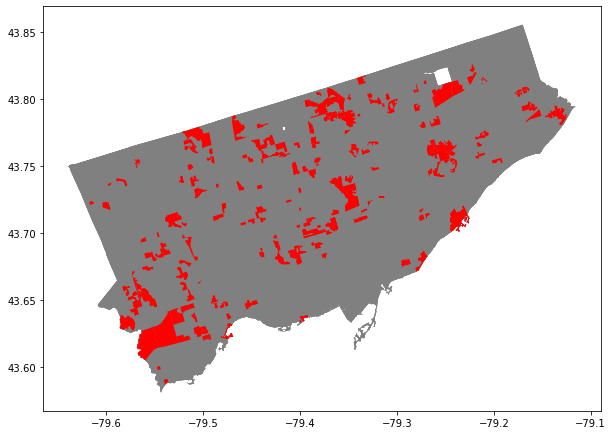

In [81]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [82]:
len(carless[carless['thres'] == True]['DAUID'].unique())

323

In [83]:
np.nansum(carless[carless['thres'] == True]['pop_carless'].unique())

39114.340017332695

In [84]:
carless[carless['thres'] == True]['diff'].describe()

count    520.000000
mean       2.790385
std        1.605717
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       10.000000
Name: diff, dtype: float64

In [85]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')


In [86]:
carless[carless['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

32880.0

In [87]:
len(gpd.overlay(carless[carless['thres']==True], NIA, how='intersection')['DAUID'].unique())

59

## Increase by 10 Mins

In [88]:
carless['thres'] = carless['diff'] >= 10

In [89]:
carless['thres'].value_counts()

False    14790
True         6
Name: thres, dtype: int64

In [90]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

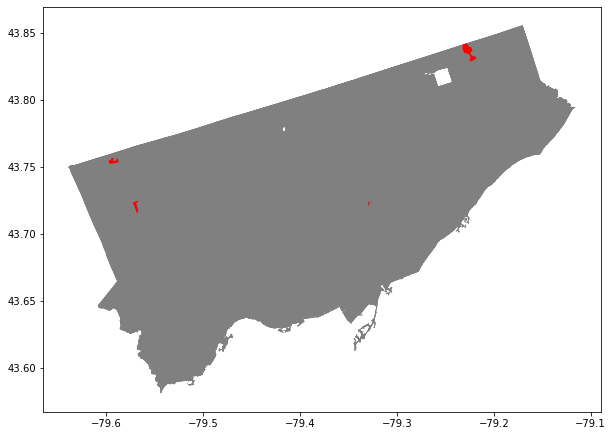

In [91]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [95]:
thres_carless = carless[carless['thres']==1]


### Number of carless who now have >=10 min increase in travel time if taking public transport

In [96]:
thres_carless.drop_duplicates('DAUID')['pop_carless'].sum()

223.9147952123572

### Number of low income who now have >=10 min increase in travel time if taking public transport

In [97]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
thres_carless[thres_carless['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

255.0

In [98]:
len(gpd.overlay(carless[carless['thres']==True], NIA, how='intersection')['DAUID'].unique())

2

## Increase by 15 Mins

In [52]:
carless['thres'] = carless['diff'] >= 15

In [53]:
carless['thres'].value_counts()

False    14796
Name: thres, dtype: int64

In [54]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

ValueError: cannot convert float NaN to integer

<Figure size 720x720 with 1 Axes>

In [56]:
thres_carless = carless[carless['thres']==1]

### Number of carless who now have >=15 min increase in  travel time if taking public transport

In [57]:
np.nansum(thres_carless['pop_carless'].unique())

0.0

### Number of low income who now have >=15 min increase in travel time if taking public transport

In [58]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
thres_carless[thres_carless['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

0.0

## Increase by 20 Mins

In [59]:
carless['thres'] = carless['diff'] >= 20

In [60]:
carless['thres'].value_counts()

False    14796
Name: thres, dtype: int64

In [61]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

In [62]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

ValueError: cannot convert float NaN to integer

<Figure size 720x720 with 1 Axes>

In [63]:
thres_carless = carless[carless['thres']==1]

### Number of carless who now have >=20 min increase in  travel time if taking public transport

In [64]:
np.nansum(thres_carless['pop_carless'].unique())

0.0

### Number of low income who now have >=20 min increase in travel time if taking public transport

In [65]:
low_income_delays.drop_duplicates('COL0')['COL7'].sum()

NameError: name 'low_income_delays' is not defined

# Average Over Time

In [4]:
times = ['0800', '1100', '1500', '0900_sat']
travel_diff_dic = {}
low_income_dic = {}
for time in times:
    travel_diff_dic[time] = travel_diff[travel_diff['time']==time]
    low_income_dic[time] = travel_diff_dic[time][(travel_diff_dic[time]['neg_access']==1) & (travel_diff_dic[time]['income_quintile']==0)]

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


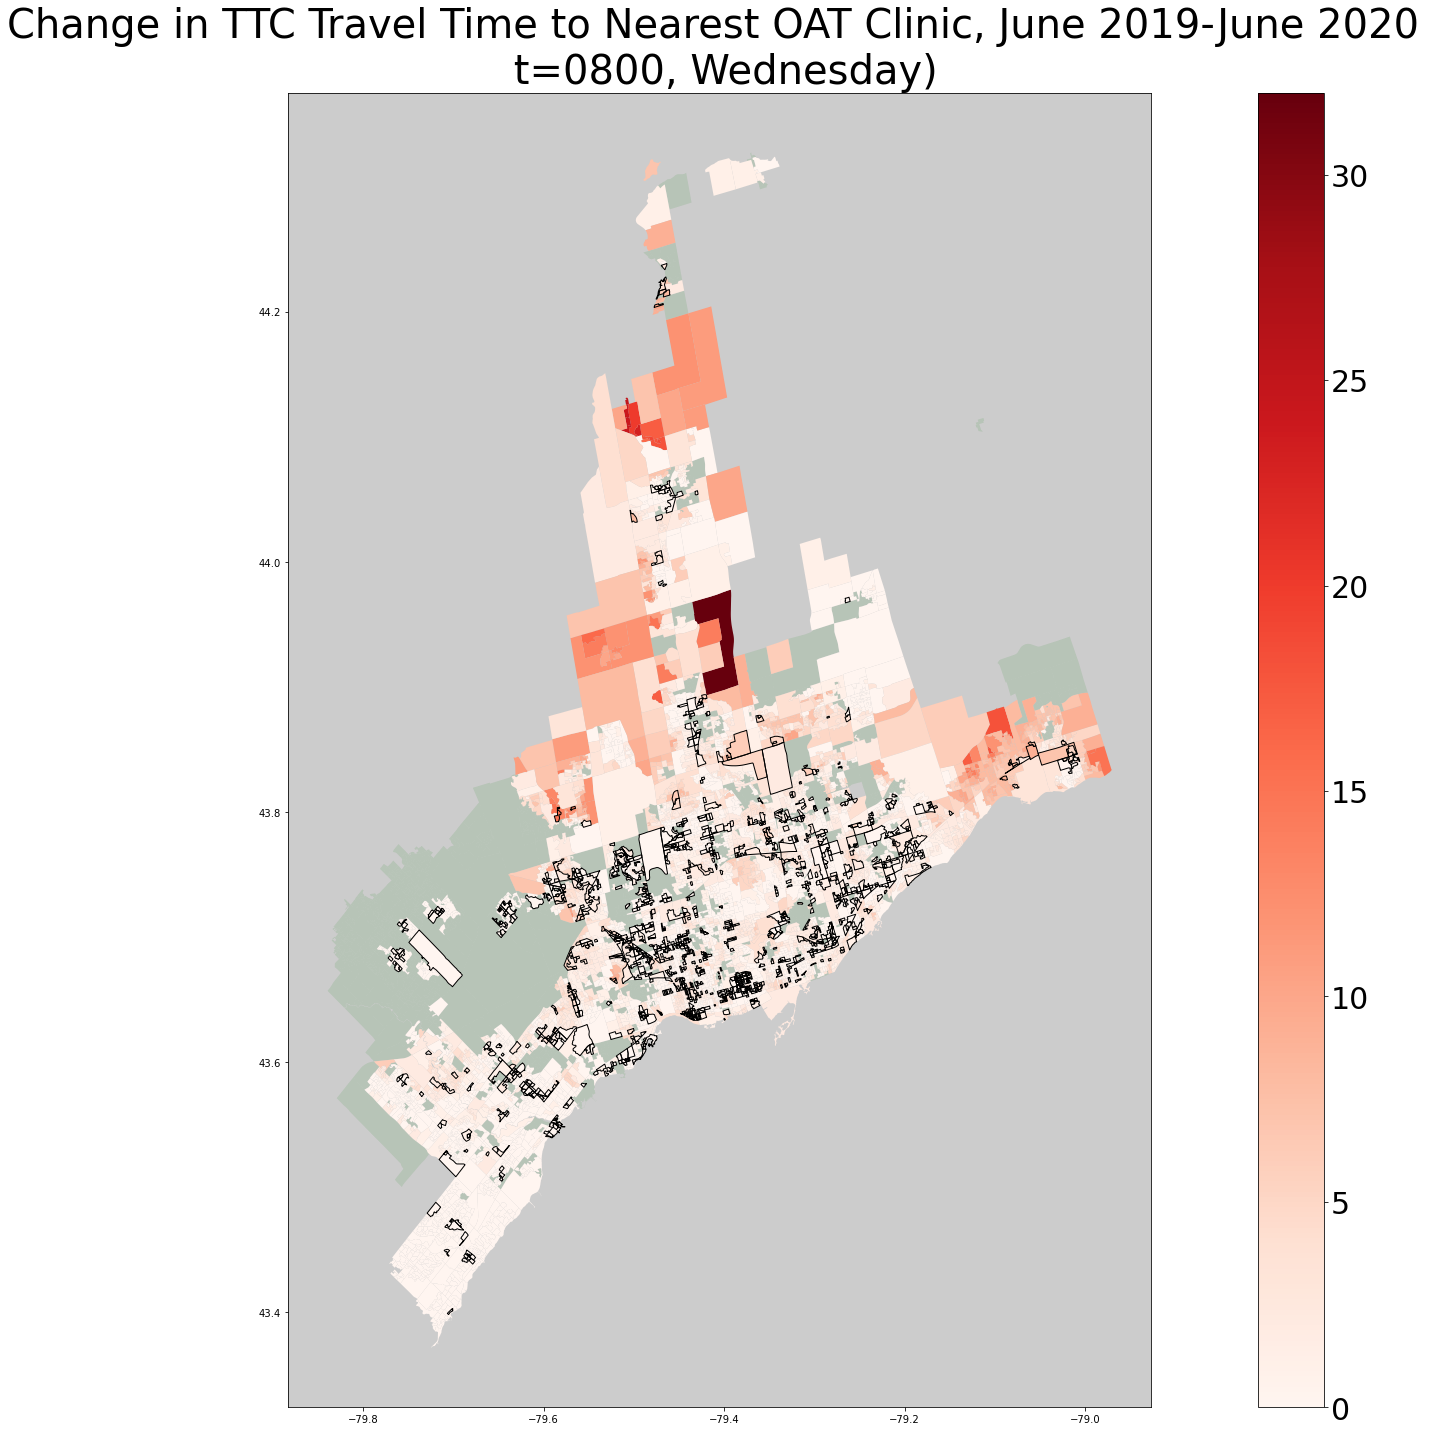

In [5]:
time = '0800'
fig, ax = plt.subplots(figsize=(30, 20))
travel_diff_dic[time][travel_diff_dic[time]['neg_access']==0].plot(column='diff', ax=ax, legend=True, color='green', alpha=0.1)
travel_diff_dic[time][travel_diff_dic[time]['neg_access']==1].plot(column='diff', ax=ax, cmap='Reds', legend=True)
low_income_dic[time].plot(facecolor='none', edgecolor='black', linewidth=1, ax=ax)
cb_ax = fig.axes[1]
ax.patch.set_facecolor('black')
ax.patch.set_alpha(0.2)
plt.title(f"Change in TTC Travel Time to Nearest OAT Clinic, June 2019-June 2020 \n t={time}, Wednesday)", fontsize=40)
cb_ax.tick_params(labelsize=30)
plt.tight_layout()
#plt.savefig(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/imgs/{time}.png')

In [390]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_dir = '/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/'

In [391]:
LICOdata = pd.read_csv(data_dir + 'LICODATADALevel.csv')

In [392]:
toronto_das = LICOdata[LICOdata['COL4'] == 'Toronto']

In [393]:
carless = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/GTAWithVarsForMaps/GTAWithVarsForMaps.shp')
employ = pd.read_csv(data_dir + 'DA employment counts/DA_EMP_2016.csv')
travel_diff = gpd.read_file(data_dir + 'results/travel_time_diff/travel_time_diff_2.shp')
clinics_gdf = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/clinic_shp/clean_clinics_v3.shp')
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
DA_income = pd.read_csv(data_dir + 'census_data/DA_income.csv')

In [394]:
carless['DAUID'] = carless['DAUID'].astype(int)

In [395]:
carless = carless[carless['DAUID'].isin(toronto_das['COL0'])]

In [396]:
carless = carless.merge(DA_income, left_on='DAUID', right_on='GeoUID')

In [397]:
carless['PCTCarless'] = carless['PCTCarless'] * 0.01

In [398]:
carless['pop_carless'] = carless['PCTCarless'] * carless['Population']

In [399]:
carless = carless.merge(travel_diff, left_on='DAUID', right_on='fromId')

In [400]:
carless.drop_duplicates('DAUID')['pop_carless'].sum()

657335.5682258331

In [401]:
travel_time_averages = carless.groupby(['DAUID'])['tt_2019', 'tt_2020', 'diff'].mean()

<ipython-input-401-8e78b900c63f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  travel_time_averages = carless.groupby(['DAUID'])['tt_2019', 'tt_2020', 'diff'].mean()


In [402]:
travel_time_averages.reset_index(inplace=True)

In [403]:
carless.drop_duplicates('DAUID', inplace=True)

In [404]:
carless = travel_time_averages.merge(carless, on='DAUID')

## Threshold 20 Minutes

In [406]:
carless['2019_u20'] = carless['tt_2019_x'] < 20
carless['2020_o20'] = carless['tt_2020_x'] >= 20

In [407]:
carless['thres'] = (carless['2019_u20'] == True) & (carless['2020_o20'] == True)

In [408]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

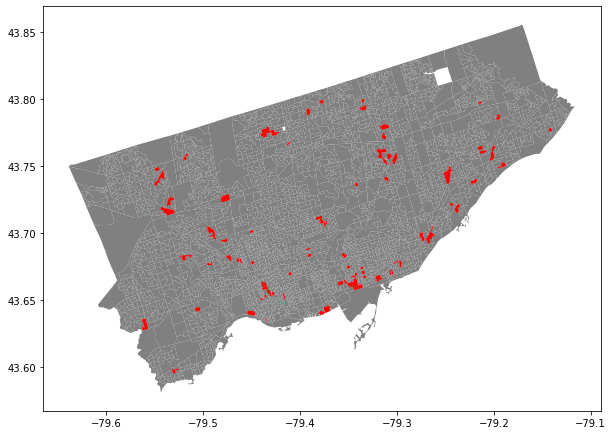

In [123]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [409]:
len(carless[carless['thres'] == True]['DAUID'].unique())

107

In [410]:
np.nansum(carless[carless['thres'] == True]['pop_carless'].unique())

21127.916806092097

In [411]:
carless[carless['thres'] == True]['diff_x'].describe()

count    107.000000
mean       1.796729
std        1.329159
min        0.250000
25%        0.875000
50%        1.500000
75%        2.250000
max        6.750000
Name: diff_x, dtype: float64

In [412]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')

In [413]:
carless[carless['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

14445.0

## Threshold 30 Minutes

In [414]:
carless['2019_u20'] = carless['tt_2019_x'] < 30
carless['2020_o20'] = carless['tt_2020_x'] >= 30

In [415]:
carless['thres'] = (carless['2019_u20'] == True) & (carless['2020_o20'] == True)

In [416]:
carless['thres'].value_counts()

False    3593
True      106
Name: thres, dtype: int64

In [417]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

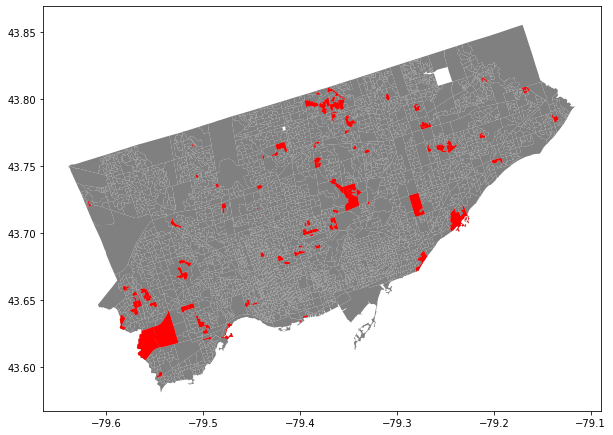

In [134]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [418]:
len(carless[carless['thres'] == True]['DAUID'].unique())

106

In [419]:
np.nansum(carless[carless['thres'] == True]['pop_carless'].unique())

11342.646667917055

In [420]:
carless[carless['thres'] == True]['diff_x'].describe()

count    106.000000
mean       2.058962
std        1.058723
min        0.250000
25%        1.312500
50%        2.000000
75%        2.750000
max        6.750000
Name: diff_x, dtype: float64

In [421]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')


In [422]:
carless[carless['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

8805.0

## Increase by 10 Mins

In [141]:
carless['thres'] = carless['diff_x'] >= 10

In [142]:
carless['thres'].value_counts()

False    3699
Name: thres, dtype: int64

In [143]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

In [144]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

ValueError: cannot convert float NaN to integer

<Figure size 720x720 with 1 Axes>

In [145]:
thres_carless = carless[carless['thres']==1]

### Number of carless who now have >=10 min increase in travel time if taking public transport

In [146]:
thres_carless.drop_duplicates('DAUID')['pop_carless'].sum()

0.0

### Number of low income who now have >=10 min increase in travel time if taking public transport

In [147]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
thres_carless[thres_carless['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

0.0

## Increase by 15 Mins

In [148]:
carless['thres'] = carless['diff_x'] >= 15

In [149]:
carless['thres'].value_counts()

False    3699
Name: thres, dtype: int64

In [150]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

ValueError: cannot convert float NaN to integer

<Figure size 720x720 with 1 Axes>

In [56]:
thres_carless = carless[carless['thres']==1]

### Number of carless who now have >=15 min increase in  travel time if taking public transport

In [57]:
np.nansum(thres_carless['pop_carless'].unique())

0.0

### Number of low income who now have >=15 min increase in travel time if taking public transport

In [58]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
thres_carless[thres_carless['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

0.0

## Increase by 20 Mins

In [59]:
carless['thres'] = carless['diff'] >= 20

In [60]:
carless['thres'].value_counts()

False    14796
Name: thres, dtype: int64

In [61]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

In [62]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

ValueError: cannot convert float NaN to integer

<Figure size 720x720 with 1 Axes>

In [63]:
thres_carless = carless[carless['thres']==1]

### Number of carless who now have >=20 min increase in  travel time if taking public transport

In [64]:
np.nansum(thres_carless['pop_carless'].unique())

0.0

### Number of low income who now have >=20 min increase in travel time if taking public transport

In [65]:
low_income_delays.drop_duplicates('COL0')['COL7'].sum()

NameError: name 'low_income_delays' is not defined

# Divided by Time

## 0800 Weekday

In [99]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_dir = '/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/'

In [100]:
LICOdata = pd.read_csv(data_dir + 'LICODATADALevel.csv')

In [101]:
toronto_das = LICOdata[LICOdata['COL4'] == 'Toronto']

In [102]:
carless = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/GTAWithVarsForMaps/GTAWithVarsForMaps.shp')
employ = pd.read_csv(data_dir + 'DA employment counts/DA_EMP_2016.csv')
travel_diff = gpd.read_file(data_dir + 'results/travel_time_diff/travel_time_diff_2.shp')
clinics_gdf = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/clinic_shp/clean_clinics_v3.shp')
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
DA_income = pd.read_csv(data_dir + 'census_data/DA_income.csv')

In [103]:
carless['DAUID'] = carless['DAUID'].astype(int)

In [104]:
carless = carless[carless['DAUID'].isin(toronto_das['COL0'])]

In [105]:
carless = carless.merge(DA_income, left_on='DAUID', right_on='GeoUID')

In [106]:
carless['PCTCarless'] = carless['PCTCarless'] * 0.01

In [107]:
carless['pop_carless'] = carless['PCTCarless'] * carless['Population']

In [108]:
carless = carless.merge(travel_diff, left_on='DAUID', right_on='fromId')

In [109]:
carless.drop_duplicates('DAUID')['pop_carless'].sum()

657335.5682258331

In [110]:
carless['time'].unique()

array(['0800', '1100', '1500', '0900_sat'], dtype=object)

### Threshold 20 Minutes

In [111]:
carless_0800 = carless[carless['time'] == '0800']

In [112]:
carless_0800['2019_u20'] = carless_0800['tt_2019'] < 20
carless_0800['2020_o20'] = carless_0800['tt_2020'] >= 20

<ipython-input-112-59367781bb2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carless_0800['2019_u20'] = carless_0800['tt_2019'] < 20
<ipython-input-112-59367781bb2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carless_0800['2020_o20'] = carless_0800['tt_2020'] >= 20


In [113]:
carless_0800['thres'] = (carless_0800['2019_u20'] == True) & (carless_0800['2020_o20'] == True)

<ipython-input-113-61b5076a39c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carless_0800['thres'] = (carless_0800['2019_u20'] == True) & (carless_0800['2020_o20'] == True)


In [114]:
carless_0800 = gpd.GeoDataFrame(carless_0800, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

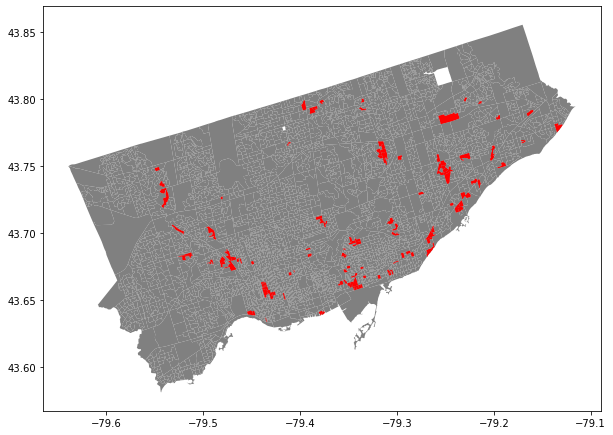

In [115]:
fig, ax = plt.subplots(figsize=(10,10))
carless_0800.plot(ax=ax, color='grey')
carless_0800[carless_0800['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [116]:
len(carless_0800[carless_0800['thres'] == True]['DAUID'].unique())

126

In [117]:
np.nansum(carless_0800[carless_0800['thres'] == True]['pop_carless'].unique())

23830.42458023738

In [118]:
carless_0800[carless_0800['thres'] == True]['diff'].describe()

count    126.000000
mean       2.444444
std        1.394593
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        7.000000
Name: diff, dtype: float64

In [119]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')

In [120]:
carless_0800[carless_0800['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

15130.0

In [121]:
len(gpd.overlay(carless_0800[carless_0800['thres']==True], NIA, how='intersection')['DAUID'].unique())

33

### Threshold 30 Minutes

In [122]:
carless_0800['2019_u20'] = carless_0800['tt_2019'] < 30
carless_0800['2020_o20'] = carless_0800['tt_2020'] >= 30

In [123]:
carless_0800['thres'] = (carless_0800['2019_u20'] == True) & (carless_0800['2020_o20'] == True)

In [124]:
carless_0800['thres'].value_counts()

False    3561
True      138
Name: thres, dtype: int64

In [125]:
carless_0800 = gpd.GeoDataFrame(carless_0800, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

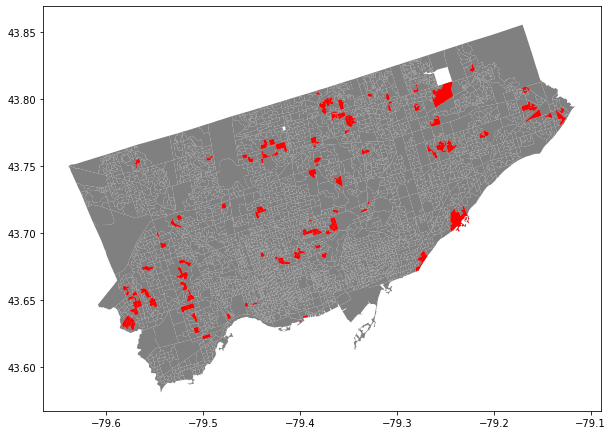

In [126]:
fig, ax = plt.subplots(figsize=(10,10))
carless_0800.plot(ax=ax, color='grey')
carless_0800[carless_0800['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [127]:
len(carless_0800[carless_0800['thres'] == True]['DAUID'].unique())

138

In [128]:
np.nansum(carless_0800[carless_0800['thres'] == True]['pop_carless'].unique())

13090.964901643525

In [129]:
carless_0800[carless_0800['thres'] == True]['diff'].describe()

count    138.000000
mean       2.927536
std        1.601266
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        9.000000
Name: diff, dtype: float64

In [130]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')


In [131]:
carless_0800[carless_0800['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

11805.0

In [132]:
len(gpd.overlay(carless_0800[carless_0800['thres']==True], NIA, how='intersection')['DAUID'].unique())

17

### Increase by 10 Mins

In [133]:
carless_0800['thres'] = carless_0800['diff'] >= 10

In [134]:
carless_0800['thres'].value_counts()

False    3696
True        3
Name: thres, dtype: int64

In [135]:
carless_0800 = gpd.GeoDataFrame(carless_0800, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

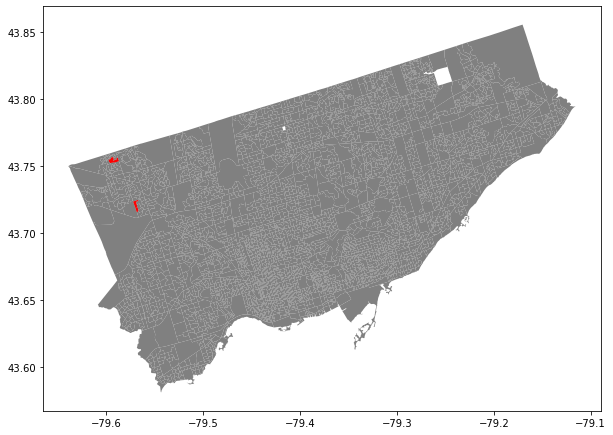

In [136]:
fig, ax = plt.subplots(figsize=(10,10))
carless_0800.plot(ax=ax, color='grey')
carless_0800[carless_0800['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [137]:
thres_carless = carless_0800[carless_0800['thres']==1]

### Number of carless who now have >=10 min increase in travel time if taking public transport

In [138]:
thres_carless.drop_duplicates('DAUID')['pop_carless'].sum()

187.87713659590202

### Number of low income who now have >=10 min increase in travel time if taking public transport

In [139]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
thres_carless[thres_carless['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

170.0

In [140]:
len(gpd.overlay(carless_0800[carless_0800['thres']==True], NIA, how='intersection')['DAUID'].unique())

1

### Increase by 15 Mins NONE

In [207]:
carless_0800['thres'] = carless_0800['diff'] >= 15

In [208]:
carless_0800['thres'].value_counts()

False    3699
Name: thres, dtype: int64

In [54]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

ValueError: cannot convert float NaN to integer

<Figure size 720x720 with 1 Axes>

In [56]:
thres_carless = carless[carless['thres']==1]

### Number of carless who now have >=15 min increase in  travel time if taking public transport

In [57]:
np.nansum(thres_carless['pop_carless'].unique())

0.0

### Number of low income who now have >=15 min increase in travel time if taking public transport

In [58]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
thres_carless[thres_carless['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

0.0

### Increase by 20 Mins NONE

In [59]:
carless['thres'] = carless['diff'] >= 20

In [60]:
carless['thres'].value_counts()

False    14796
Name: thres, dtype: int64

In [61]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

In [62]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

ValueError: cannot convert float NaN to integer

<Figure size 720x720 with 1 Axes>

In [63]:
thres_carless = carless[carless['thres']==1]

### Number of carless who now have >=20 min increase in  travel time if taking public transport

In [64]:
np.nansum(thres_carless['pop_carless'].unique())

0.0

### Number of low income who now have >=20 min increase in travel time if taking public transport

In [65]:
low_income_delays.drop_duplicates('COL0')['COL7'].sum()

NameError: name 'low_income_delays' is not defined

## 1100 Weekday

In [141]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_dir = '/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/'

In [142]:
LICOdata = pd.read_csv(data_dir + 'LICODATADALevel.csv')

In [143]:
toronto_das = LICOdata[LICOdata['COL4'] == 'Toronto']

In [144]:
carless = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/GTAWithVarsForMaps/GTAWithVarsForMaps.shp')
employ = pd.read_csv(data_dir + 'DA employment counts/DA_EMP_2016.csv')
travel_diff = gpd.read_file(data_dir + 'results/travel_time_diff/travel_time_diff_2.shp')
clinics_gdf = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/clinic_shp/clean_clinics_v3.shp')
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
DA_income = pd.read_csv(data_dir + 'census_data/DA_income.csv')

In [145]:
carless['DAUID'] = carless['DAUID'].astype(int)

In [146]:
carless = carless[carless['DAUID'].isin(toronto_das['COL0'])]

In [147]:
carless = carless.merge(DA_income, left_on='DAUID', right_on='GeoUID')

In [148]:
carless['PCTCarless'] = carless['PCTCarless'] * 0.01

In [149]:
carless['pop_carless'] = carless['PCTCarless'] * carless['Population']

In [150]:
carless = carless.merge(travel_diff, left_on='DAUID', right_on='fromId')

In [151]:
carless.drop_duplicates('DAUID')['pop_carless'].sum()

657335.5682258331

In [152]:
carless['time'].unique()

array(['0800', '1100', '1500', '0900_sat'], dtype=object)

### Threshold 20 Minutes

In [153]:
carless_1100 = carless[carless['time'] == '1100']

In [154]:
carless_1100['2019_u20'] = carless_1100['tt_2019'] < 20
carless_1100['2020_o20'] = carless_1100['tt_2020'] >= 20

<ipython-input-154-ecaf323752b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carless_1100['2019_u20'] = carless_1100['tt_2019'] < 20
<ipython-input-154-ecaf323752b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carless_1100['2020_o20'] = carless_1100['tt_2020'] >= 20


In [155]:
carless_1100['thres'] = (carless_1100['2019_u20'] == True) & (carless_1100['2020_o20'] == True)

<ipython-input-155-e693ba3e606e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carless_1100['thres'] = (carless_1100['2019_u20'] == True) & (carless_1100['2020_o20'] == True)


In [156]:
carless_1100 = gpd.GeoDataFrame(carless_1100, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

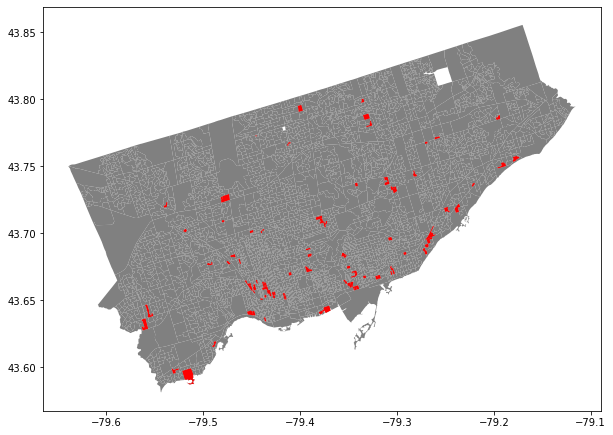

In [157]:
fig, ax = plt.subplots(figsize=(10,10))
carless_1100.plot(ax=ax, color='grey')
carless_1100[carless_1100['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [158]:
len(carless_1100[carless_1100['thres'] == True]['DAUID'].unique())

90

In [159]:
np.nansum(carless_1100[carless_1100['thres'] == True]['pop_carless'].unique())

16167.631320150425

In [160]:
carless_1100[carless_1100['thres'] == True]['diff'].describe()

count    90.000000
mean      2.144444
std       1.176178
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       6.000000
Name: diff, dtype: float64

In [161]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')

In [162]:
carless_1100[carless_1100['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

10575.0

In [163]:
len(gpd.overlay(carless_1100[carless_1100['thres']==True], NIA, how='intersection')['DAUID'].unique())

17

### Threshold 30 Minutes

In [171]:
carless_1100['2019_u20'] = carless_1100['tt_2019'] < 30
carless_1100['2020_o20'] = carless_1100['tt_2020'] >= 30

In [172]:
carless_1100['thres'] = (carless_1100['2019_u20'] == True) & (carless_1100['2020_o20'] == True)

In [173]:
carless_1100['thres'].value_counts()

False    3568
True      131
Name: thres, dtype: int64

In [167]:
carless_1100 = gpd.GeoDataFrame(carless_1100, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

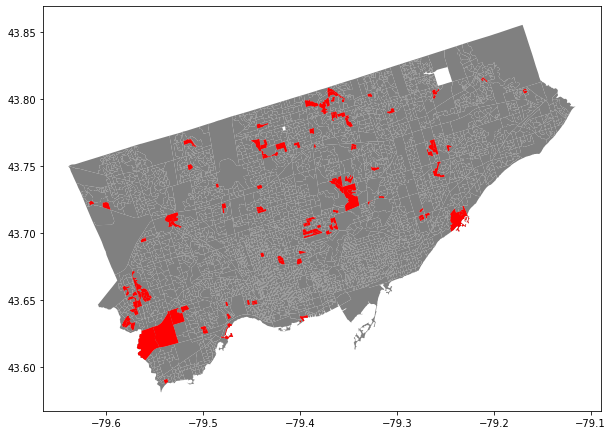

In [168]:
fig, ax = plt.subplots(figsize=(10,10))
carless_1100.plot(ax=ax, color='grey')
carless_1100[carless_1100['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [169]:
len(carless_1100[carless_1100['thres'] == True]['DAUID'].unique())

131

In [170]:
np.nansum(carless_1100[carless_1100['thres'] == True]['pop_carless'].unique())

19333.274483065095

In [174]:
carless_1100[carless_1100['thres'] == True]['diff'].describe()

count    131.000000
mean       2.877863
std        1.588531
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       10.000000
Name: diff, dtype: float64

In [175]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')


In [180]:
carless_1100[carless_1100['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

16000.0

In [181]:
len(gpd.overlay(carless_1100[carless_1100['thres']==True], NIA, how='intersection')['DAUID'].unique())

17

### Increase by 10 Mins

In [182]:
carless_1100['thres'] = carless_1100['diff'] >= 10

In [183]:
carless_1100['thres'].value_counts()

False    3698
True        1
Name: thres, dtype: int64

In [184]:
carless_1100 = gpd.GeoDataFrame(carless_1100, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

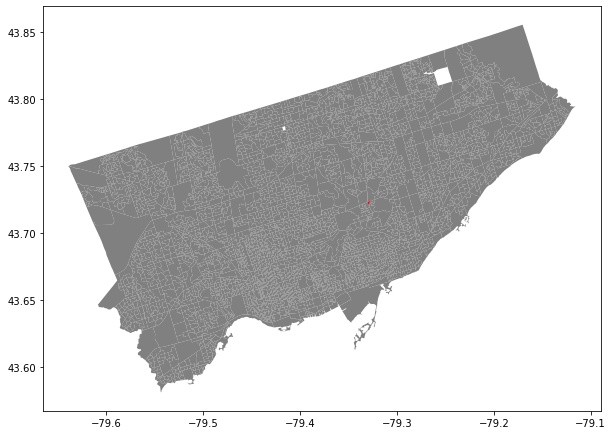

In [185]:
fig, ax = plt.subplots(figsize=(10,10))
carless_1100.plot(ax=ax, color='grey')
carless_1100[carless_1100['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [186]:
thres_carless = carless_1100[carless_1100['thres']==1]

### Number of carless who now have >=10 min increase in travel time if taking public transport

In [187]:
low_income_cutoff[low_income_cutoff['COL0'] == 35204878]

COL0  COL1     COL2  COL3     COL4  COL5  COL6  COL7  COL8
8996  35204878    35  Ontario    20  Toronto  4878   NaN   NaN   NaN

In [188]:
thres_carless.drop_duplicates('DAUID')['pop_carless'].sum()

0.0

### Number of low income who now have >=10 min increase in travel time if taking public transport

In [189]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
thres_carless[thres_carless['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

0.0

In [190]:
len(gpd.overlay(carless_1100[carless_1100['thres']==True], NIA, how='intersection')['DAUID'].unique())

1

### Increase by 15 Mins NONE

In [207]:
carless_0800['thres'] = carless_0800['diff'] >= 15

In [208]:
carless_0800['thres'].value_counts()

False    3699
Name: thres, dtype: int64

In [54]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

ValueError: cannot convert float NaN to integer

<Figure size 720x720 with 1 Axes>

In [56]:
thres_carless = carless[carless['thres']==1]

### Number of carless who now have >=15 min increase in  travel time if taking public transport

In [57]:
np.nansum(thres_carless['pop_carless'].unique())

0.0

### Number of low income who now have >=15 min increase in travel time if taking public transport

In [58]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
thres_carless[thres_carless['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

0.0

### Increase by 20 Mins NONE

In [59]:
carless['thres'] = carless['diff'] >= 20

In [60]:
carless['thres'].value_counts()

False    14796
Name: thres, dtype: int64

In [61]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

In [62]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

ValueError: cannot convert float NaN to integer

<Figure size 720x720 with 1 Axes>

In [63]:
thres_carless = carless[carless['thres']==1]

### Number of carless who now have >=20 min increase in  travel time if taking public transport

In [64]:
np.nansum(thres_carless['pop_carless'].unique())

0.0

### Number of low income who now have >=20 min increase in travel time if taking public transport

In [65]:
low_income_delays.drop_duplicates('COL0')['COL7'].sum()

NameError: name 'low_income_delays' is not defined

## 1500 Weekday

In [191]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_dir = '/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/'

In [192]:
LICOdata = pd.read_csv(data_dir + 'LICODATADALevel.csv')

In [193]:
toronto_das = LICOdata[LICOdata['COL4'] == 'Toronto']

In [194]:
carless = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/GTAWithVarsForMaps/GTAWithVarsForMaps.shp')
employ = pd.read_csv(data_dir + 'DA employment counts/DA_EMP_2016.csv')
travel_diff = gpd.read_file(data_dir + 'results/travel_time_diff/travel_time_diff_2.shp')
clinics_gdf = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/clinic_shp/clean_clinics_v3.shp')
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
DA_income = pd.read_csv(data_dir + 'census_data/DA_income.csv')

In [195]:
carless['DAUID'] = carless['DAUID'].astype(int)

In [196]:
carless = carless[carless['DAUID'].isin(toronto_das['COL0'])]

In [197]:
carless = carless.merge(DA_income, left_on='DAUID', right_on='GeoUID')

In [198]:
carless['PCTCarless'] = carless['PCTCarless'] * 0.01

In [199]:
carless['pop_carless'] = carless['PCTCarless'] * carless['Population']

In [200]:
carless = carless.merge(travel_diff, left_on='DAUID', right_on='fromId')

In [201]:
carless.drop_duplicates('DAUID')['pop_carless'].sum()

657335.5682258331

In [202]:
carless['time'].unique()

array(['0800', '1100', '1500', '0900_sat'], dtype=object)

### Threshold 20 Minutes

In [203]:
carless_1500 = carless[carless['time'] == '1500']

In [204]:
carless_1500['2019_u20'] = carless_1500['tt_2019'] < 20
carless_1500['2020_o20'] = carless_1500['tt_2020'] >= 20

<ipython-input-204-ce36ed2c8fcc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carless_1500['2019_u20'] = carless_1500['tt_2019'] < 20
<ipython-input-204-ce36ed2c8fcc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carless_1500['2020_o20'] = carless_1500['tt_2020'] >= 20


In [205]:
carless_1500['thres'] = (carless_1500['2019_u20'] == True) & (carless_1500['2020_o20'] == True)

<ipython-input-205-7fb34e8bd405>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carless_1500['thres'] = (carless_1500['2019_u20'] == True) & (carless_1500['2020_o20'] == True)


In [206]:
carless_1500 = gpd.GeoDataFrame(carless_1500, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

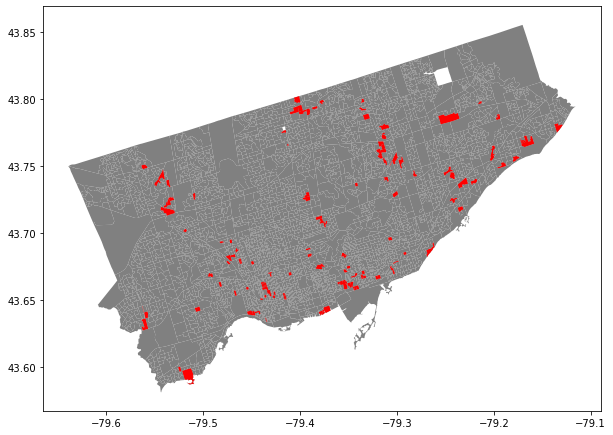

In [207]:
fig, ax = plt.subplots(figsize=(10,10))
carless_1500.plot(ax=ax, color='grey')
carless_1500[carless_1500['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [208]:
len(carless_1500[carless_1500['thres'] == True]['DAUID'].unique())

126

In [209]:
np.nansum(carless_1500[carless_1500['thres'] == True]['pop_carless'].unique())

23380.78254625966

In [210]:
carless_1500[carless_1500['thres'] == True]['diff'].describe()

count    126.000000
mean       2.309524
std        1.433677
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        7.000000
Name: diff, dtype: float64

In [211]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')

In [212]:
carless_1500[carless_1500['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

15205.0

In [214]:
len(gpd.overlay(carless_1500[carless_1500['thres']==True], NIA, how='intersection')['DAUID'].unique())

35

### Threshold 30 Minutes

In [215]:
carless_1500['2019_u20'] = carless_1500['tt_2019'] < 30
carless_1500['2020_o20'] = carless_1500['tt_2020'] >= 30

In [216]:
carless_1500['thres'] = (carless_1500['2019_u20'] == True) & (carless_1500['2020_o20'] == True)

In [217]:
carless_1500['thres'].value_counts()

False    3549
True      150
Name: thres, dtype: int64

In [218]:
carless_1500 = gpd.GeoDataFrame(carless_1500, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

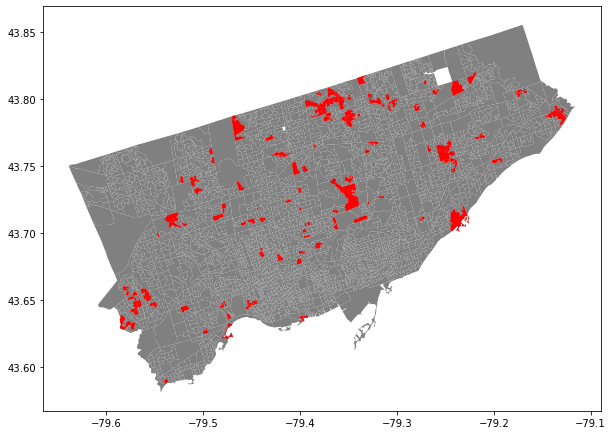

In [219]:
fig, ax = plt.subplots(figsize=(10,10))
carless_1500.plot(ax=ax, color='grey')
carless_1500[carless_1500['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [220]:
len(carless_1500[carless_1500['thres'] == True]['DAUID'].unique())

150

In [221]:
np.nansum(carless_1500[carless_1500['thres'] == True]['pop_carless'].unique())

16671.87610015616

In [222]:
carless_1500[carless_1500['thres'] == True]['diff'].describe()

count    150.000000
mean       2.900000
std        1.756102
min        1.000000
25%        1.000000
50%        3.000000
75%        4.000000
max        8.000000
Name: diff, dtype: float64

In [223]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')


In [224]:
carless_1500[carless_1500['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

13050.0

In [225]:
len(gpd.overlay(carless_1500[carless_1500['thres']==True], NIA, how='intersection')['DAUID'].unique())

31

### Increase by 10 Mins

In [226]:
carless_1500['thres'] = carless_1500['diff'] >= 10

In [227]:
carless_1500['thres'].value_counts()

False    3697
True        2
Name: thres, dtype: int64

In [228]:
carless_1500 = gpd.GeoDataFrame(carless_1500, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

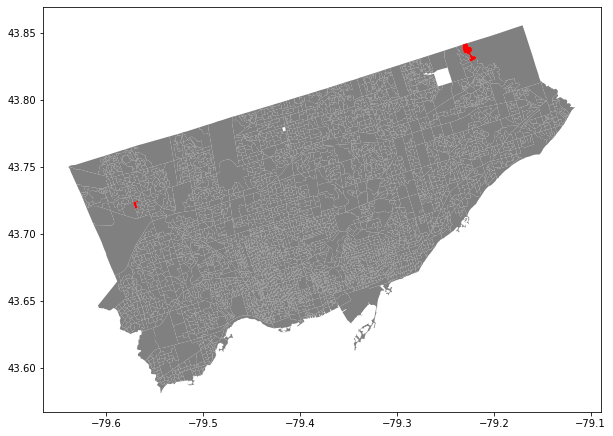

In [229]:
fig, ax = plt.subplots(figsize=(10,10))
carless_1500.plot(ax=ax, color='grey')
carless_1500[carless_1500['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [230]:
thres_carless = carless_1500[carless_1500['thres']==1]

### Number of carless who now have >=10 min increase in travel time if taking public transport

In [231]:
thres_carless.drop_duplicates('DAUID')['pop_carless'].sum()

36.03765861645517

### Number of low income who now have >=10 min increase in travel time if taking public transport

In [232]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
thres_carless[thres_carless['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

140.0

In [233]:
len(gpd.overlay(carless_1500[carless_1500['thres']==True], NIA, how='intersection')['DAUID'].unique())

0

### Increase by 15 Mins NONE

In [311]:
carless_1500['thres'] = carless_1500['diff'] >= 15

In [312]:
carless_1500['thres'].value_counts()

False    3699
Name: thres, dtype: int64

In [54]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

ValueError: cannot convert float NaN to integer

<Figure size 720x720 with 1 Axes>

In [56]:
thres_carless = carless[carless['thres']==1]

### Number of carless who now have >=15 min increase in  travel time if taking public transport

In [57]:
np.nansum(thres_carless['pop_carless'].unique())

0.0

### Number of low income who now have >=15 min increase in travel time if taking public transport

In [58]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
thres_carless[thres_carless['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

0.0

### Increase by 20 Mins NONE

In [59]:
carless['thres'] = carless['diff'] >= 20

In [60]:
carless['thres'].value_counts()

False    14796
Name: thres, dtype: int64

In [61]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

In [62]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

ValueError: cannot convert float NaN to integer

<Figure size 720x720 with 1 Axes>

In [63]:
thres_carless = carless[carless['thres']==1]

### Number of carless who now have >=20 min increase in  travel time if taking public transport

In [64]:
np.nansum(thres_carless['pop_carless'].unique())

0.0

### Number of low income who now have >=20 min increase in travel time if taking public transport

In [65]:
low_income_delays.drop_duplicates('COL0')['COL7'].sum()

NameError: name 'low_income_delays' is not defined

## 0900 Saturday

In [234]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_dir = '/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/'

In [235]:
LICOdata = pd.read_csv(data_dir + 'LICODATADALevel.csv')

In [236]:
toronto_das = LICOdata[LICOdata['COL4'] == 'Toronto']

In [237]:
carless = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/GTAWithVarsForMaps/GTAWithVarsForMaps.shp')
employ = pd.read_csv(data_dir + 'DA employment counts/DA_EMP_2016.csv')
travel_diff = gpd.read_file(data_dir + 'results/travel_time_diff/travel_time_diff_2.shp')
clinics_gdf = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/clinic_shp/clean_clinics_v3.shp')
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
DA_income = pd.read_csv(data_dir + 'census_data/DA_income.csv')

In [238]:
carless['DAUID'] = carless['DAUID'].astype(int)

In [239]:
carless = carless[carless['DAUID'].isin(toronto_das['COL0'])]

In [240]:
carless = carless.merge(DA_income, left_on='DAUID', right_on='GeoUID')

In [241]:
carless['PCTCarless'] = carless['PCTCarless'] * 0.01

In [242]:
carless['pop_carless'] = carless['PCTCarless'] * carless['Population']

In [243]:
carless = carless.merge(travel_diff, left_on='DAUID', right_on='fromId')

In [244]:
carless.drop_duplicates('DAUID')['pop_carless'].sum()

657335.5682258331

In [245]:
carless['time'].unique()

array(['0800', '1100', '1500', '0900_sat'], dtype=object)

### Threshold 20 Minutes

In [246]:
carless_0900_sat = carless[carless['time'] == '0900_sat']

In [247]:
carless_0900_sat['2019_u20'] = carless_0900_sat['tt_2019'] < 20
carless_0900_sat['2020_o20'] = carless_0900_sat['tt_2020'] >= 20

<ipython-input-247-25c0fa624bb0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carless_0900_sat['2019_u20'] = carless_0900_sat['tt_2019'] < 20
<ipython-input-247-25c0fa624bb0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carless_0900_sat['2020_o20'] = carless_0900_sat['tt_2020'] >= 20


In [248]:
carless_0900_sat['thres'] = (carless_0900_sat['2019_u20'] == True) & (carless_0900_sat['2020_o20'] == True)

<ipython-input-248-508118c3b40b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carless_0900_sat['thres'] = (carless_0900_sat['2019_u20'] == True) & (carless_0900_sat['2020_o20'] == True)


In [249]:
carless_0900_sat = gpd.GeoDataFrame(carless_0900_sat, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

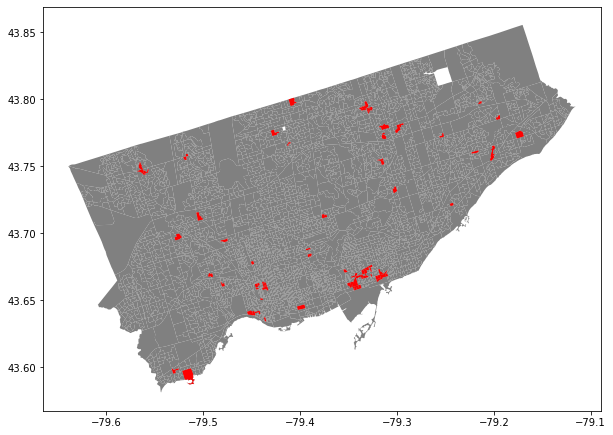

In [250]:
fig, ax = plt.subplots(figsize=(10,10))
carless_0900_sat.plot(ax=ax, color='grey')
carless_0900_sat[carless_0900_sat['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [251]:
len(carless_0900_sat[carless_0900_sat['thres'] == True]['DAUID'].unique())

79

In [252]:
np.nansum(carless_0900_sat[carless_0900_sat['thres'] == True]['pop_carless'].unique())

16793.863226346297

In [253]:
carless_0900_sat[carless_0900_sat['thres'] == True]['diff'].describe()

count    79.000000
mean      2.405063
std       1.589380
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       7.000000
Name: diff, dtype: float64

In [254]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')

In [255]:
carless_0900_sat[carless_0900_sat['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

10880.0

In [257]:
len(gpd.overlay(carless_0900_sat[carless_0900_sat['thres']==True], NIA, how='intersection')['DAUID'].unique())

18

### Threshold 30 Minutes

In [258]:
carless_0900_sat['2019_u20'] = carless_0900_sat['tt_2019'] < 30
carless_0900_sat['2020_o20'] = carless_0900_sat['tt_2020'] >= 30

In [259]:
carless_0900_sat['thres'] = (carless_0900_sat['2019_u20'] == True) & (carless_0900_sat['2020_o20'] == True)

In [260]:
carless_0900_sat['thres'].value_counts()

False    3598
True      101
Name: thres, dtype: int64

In [261]:
carless_0900_sat = gpd.GeoDataFrame(carless_0900_sat, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

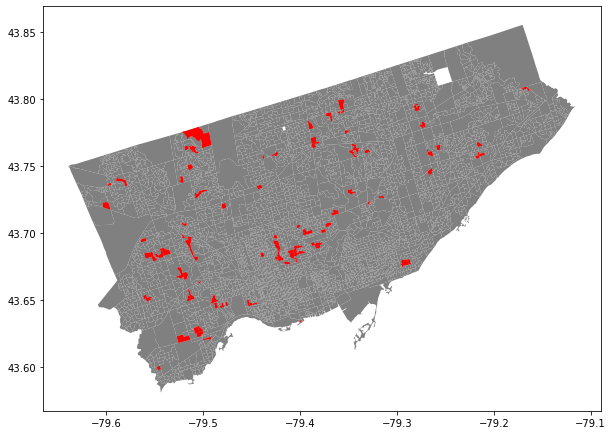

In [262]:
fig, ax = plt.subplots(figsize=(10,10))
carless_0900_sat.plot(ax=ax, color='grey')
carless_0900_sat[carless_0900_sat['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [263]:
len(carless_0900_sat[carless_0900_sat['thres'] == True]['DAUID'].unique())

101

In [264]:
np.nansum(carless_0900_sat[carless_0900_sat['thres'] == True]['pop_carless'].unique())

13260.309395943092

In [265]:
carless_0900_sat[carless_0900_sat['thres'] == True]['diff'].describe()

count    101.000000
mean       2.326733
std        1.312318
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: diff, dtype: float64

In [266]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')


In [267]:
carless_0900_sat[carless_0900_sat['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

10525.0

In [268]:
len(gpd.overlay(carless_0900_sat[carless_0900_sat['thres']==True], NIA, how='intersection')['DAUID'].unique())

18

### Increase by 10 Mins NONE

In [345]:
carless_0900_sat['thres'] = carless_0900_sat['diff'] >= 10

In [346]:
carless_0900_sat['thres'].value_counts()

False    3699
Name: thres, dtype: int64

In [242]:
carless_1100 = gpd.GeoDataFrame(carless_1100, geometry='geometry_y')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

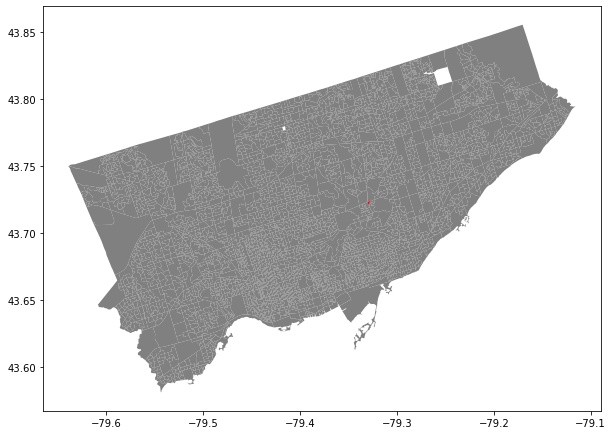

In [243]:
fig, ax = plt.subplots(figsize=(10,10))
carless_1100.plot(ax=ax, color='grey')
carless_1100[carless_1100['thres']==1].plot(column='thres', color = 'red', ax=ax)

In [248]:
thres_carless = carless_1100[carless_1100['thres']==1]

### Number of carless who now have >=10 min increase in travel time if taking public transport

In [253]:
low_income_cutoff[low_income_cutoff['COL0'] == 35204878]

COL0  COL1     COL2  COL3     COL4  COL5  COL6  COL7  COL8
8996  35204878    35  Ontario    20  Toronto  4878   NaN   NaN   NaN

In [249]:
thres_carless.drop_duplicates('DAUID')['pop_carless'].sum()

0.0

### Number of low income who now have >=10 min increase in travel time if taking public transport

In [254]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
thres_carless[thres_carless['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

0.0

### Increase by 15 Mins NONE

In [207]:
carless_0800['thres'] = carless_0800['diff'] >= 15

In [208]:
carless_0800['thres'].value_counts()

False    3699
Name: thres, dtype: int64

In [54]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

ValueError: cannot convert float NaN to integer

<Figure size 720x720 with 1 Axes>

In [56]:
thres_carless = carless[carless['thres']==1]

### Number of carless who now have >=15 min increase in  travel time if taking public transport

In [57]:
np.nansum(thres_carless['pop_carless'].unique())

0.0

### Number of low income who now have >=15 min increase in travel time if taking public transport

In [58]:
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
thres_carless[thres_carless['thres']==True].merge(low_income_cutoff, left_on='GeoUID_y', right_on='COL0').drop_duplicates('DAUID')['COL7'].sum()

0.0

### Increase by 20 Mins NONE

In [59]:
carless['thres'] = carless['diff'] >= 20

In [60]:
carless['thres'].value_counts()

False    14796
Name: thres, dtype: int64

In [61]:
carless = gpd.GeoDataFrame(carless, geometry='geometry_y')

In [62]:
fig, ax = plt.subplots(figsize=(10,10))
carless.plot(ax=ax, color='grey')
carless[carless['thres']==1].plot(column='thres', color = 'red', ax=ax)

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

ValueError: cannot convert float NaN to integer

<Figure size 720x720 with 1 Axes>

In [63]:
thres_carless = carless[carless['thres']==1]

### Number of carless who now have >=20 min increase in  travel time if taking public transport

In [64]:
np.nansum(thres_carless['pop_carless'].unique())

0.0

### Number of low income who now have >=20 min increase in travel time if taking public transport

In [65]:
low_income_delays.drop_duplicates('COL0')['COL7'].sum()

NameError: name 'low_income_delays' is not defined

## Plotting

In [269]:
import contextily as ctx

In [270]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_dir = '/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/'

In [271]:
LICOdata = pd.read_csv(data_dir + 'LICODATADALevel.csv')

In [272]:
toronto_das = LICOdata[LICOdata['COL4'] == 'Toronto']

In [273]:
carless = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/GTAWithVarsForMaps/GTAWithVarsForMaps.shp')
employ = pd.read_csv(data_dir + 'DA employment counts/DA_EMP_2016.csv')
travel_diff = gpd.read_file(data_dir + 'results/travel_time_diff/travel_time_diff_2.shp')
clinics_gdf = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/clinic_shp/clean_clinics_v3.shp')
low_income_cutoff = pd.read_csv('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/low_income_cutoff/LICODataDALevel.csv')
DA_income = pd.read_csv(data_dir + 'census_data/DA_income.csv')

In [274]:
NIA = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/neighbourhood-improvement-areas-wgs84/NEIGHBOURHOOD_IMPROVEMENT_AREA_WGS84.shp')
NIA.to_crs(epsg='3857', inplace=True)

In [275]:
carless = carless.merge(low_income_cutoff, left_on='DAUID', right_on='COL0')

In [276]:
toronto_das

COL0  COL1     COL2  COL3     COL4  COL5       COL6      COL7  COL8
5322      3520    35  Ontario    20  Toronto     0  2691665.0  469330.0  17.4
5323  35200002    35  Ontario    20  Toronto     2      355.0      25.0   7.0
5324  35200003    35  Ontario    20  Toronto     3      335.0      35.0  10.4
5325  35200004    35  Ontario    20  Toronto     4      385.0      40.0  10.4
5326  35200005    35  Ontario    20  Toronto     5      405.0      25.0   6.2
...        ...   ...      ...   ...      ...   ...        ...       ...   ...
9020  35204902    35  Ontario    20  Toronto  4902      500.0     165.0  33.0
9021  35204903    35  Ontario    20  Toronto  4903     3490.0    1170.0  33.5
9022  35204904    35  Ontario    20  Toronto  4904      625.0     175.0  28.0
9023  35204905    35  Ontario    20  Toronto  4905     1770.0     525.0  29.7
9024  35204906    35  Ontario    20  Toronto  4906     1255.0     340.0  27.1

[3703 rows x 9 columns]

In [277]:
travel_diff = travel_diff[travel_diff['fromId'].isin(toronto_das['COL0'])]

In [278]:
travel_diff

fromId                                             toId_x  tt_2019  \
1408   35200002  TrueNorth Medical Centre - Scarborough - Markh...       37   
1409   35200003  TrueNorth Medical Centre - Scarborough - Markh...       37   
1410   35200004  TrueNorth Medical Centre - Scarborough - Markh...       35   
1411   35200005  TrueNorth Medical Centre - Scarborough - Markh...       34   
1412   35200006  TrueNorth Medical Centre - Scarborough - Markh...       36   
...         ...                                                ...      ...   
25706  35204902      Women?s College Hospital, 76 Grenville Street        5   
25707  35204903  TrueNorth Medical Centre - Scarborough - Green...       31   
25708  35204904  TrueNorth Medical Centre - Scarborough - Green...       30   
25709  35204905  TrueNorth Medical Centre - Scarborough - Green...       17   
25710  35204906  TrueNorth Medical Centre - Scarborough - Green...       27   

       tt_2020  diff    GeoUID  neg_access      time  weekend  \
1408        37     0  35200002           1      0800        0   
1409        38     1  35200003           1      0800        0   
1410        35     0  35200004           1      0800        0   
1411        33    -1  35200005           0      0800        0   
1412        35    -1  35200006           0      0800        0   
...        ...   ...       ...         ...       ...      ...   
25706        5     0  35204902           1  0900_sat        1   
25707       34     3  35204903           1  0900_sat        1   
25708       32     2  35204904           1  0900_sat        1   
25709       18     1  35204905           1  0900_sat        1   
25710       26    -1  35204906           0  0900_sat        1   

                                                geometry  
1408   POLYGON ((-79.20270 43.82367, -79.20228 43.822...  
1409   POLYGON ((-79.20126 43.82041, -79.20080 43.819...  
1410   POLYGON ((-79.20522 43.81890, -79.20524 43.818...  
1411   POLYGON ((-79.20414 43.81748, -79.20447 43.817...  
1412   POLYGON ((-79.20335 43.81687, -79.20361 43.816...  
...                                                  ...  
25706  POLYGON ((-79.38372 43.66124, -79.38584 43.660...  
25707  POLYGON ((-79.37532 43.76559, -79.37546 43.765...  
25708  POLYGON ((-79.37593 43.76551, -79.37609 43.765...  
25709  POLYGON ((-79.33724 43.76771, -79.33725 43.767...  
25710  POLYGON ((-79.33877 43.77264, -79.33866 43.772...  

[14796 rows x 10 columns]

In [279]:
times = ['0800', '1100', '1500', '0900_sat']
travel_diff_dic = {}
low_income_dic = {}
for time in times:
    print(time)
    travel_diff_dic[time] = gpd.GeoDataFrame(travel_diff[travel_diff['time']==time], geometry='geometry')
    travel_diff_dic[time].to_crs(epsg=3857, inplace=True)
    #low_income_dic[time] = travel_diff_dic[time][(travel_diff_dic[time]['neg_access']==1) & (travel_diff_dic[time]['income_quintile']==0)]

0800
1100
1500
0900_sat


/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


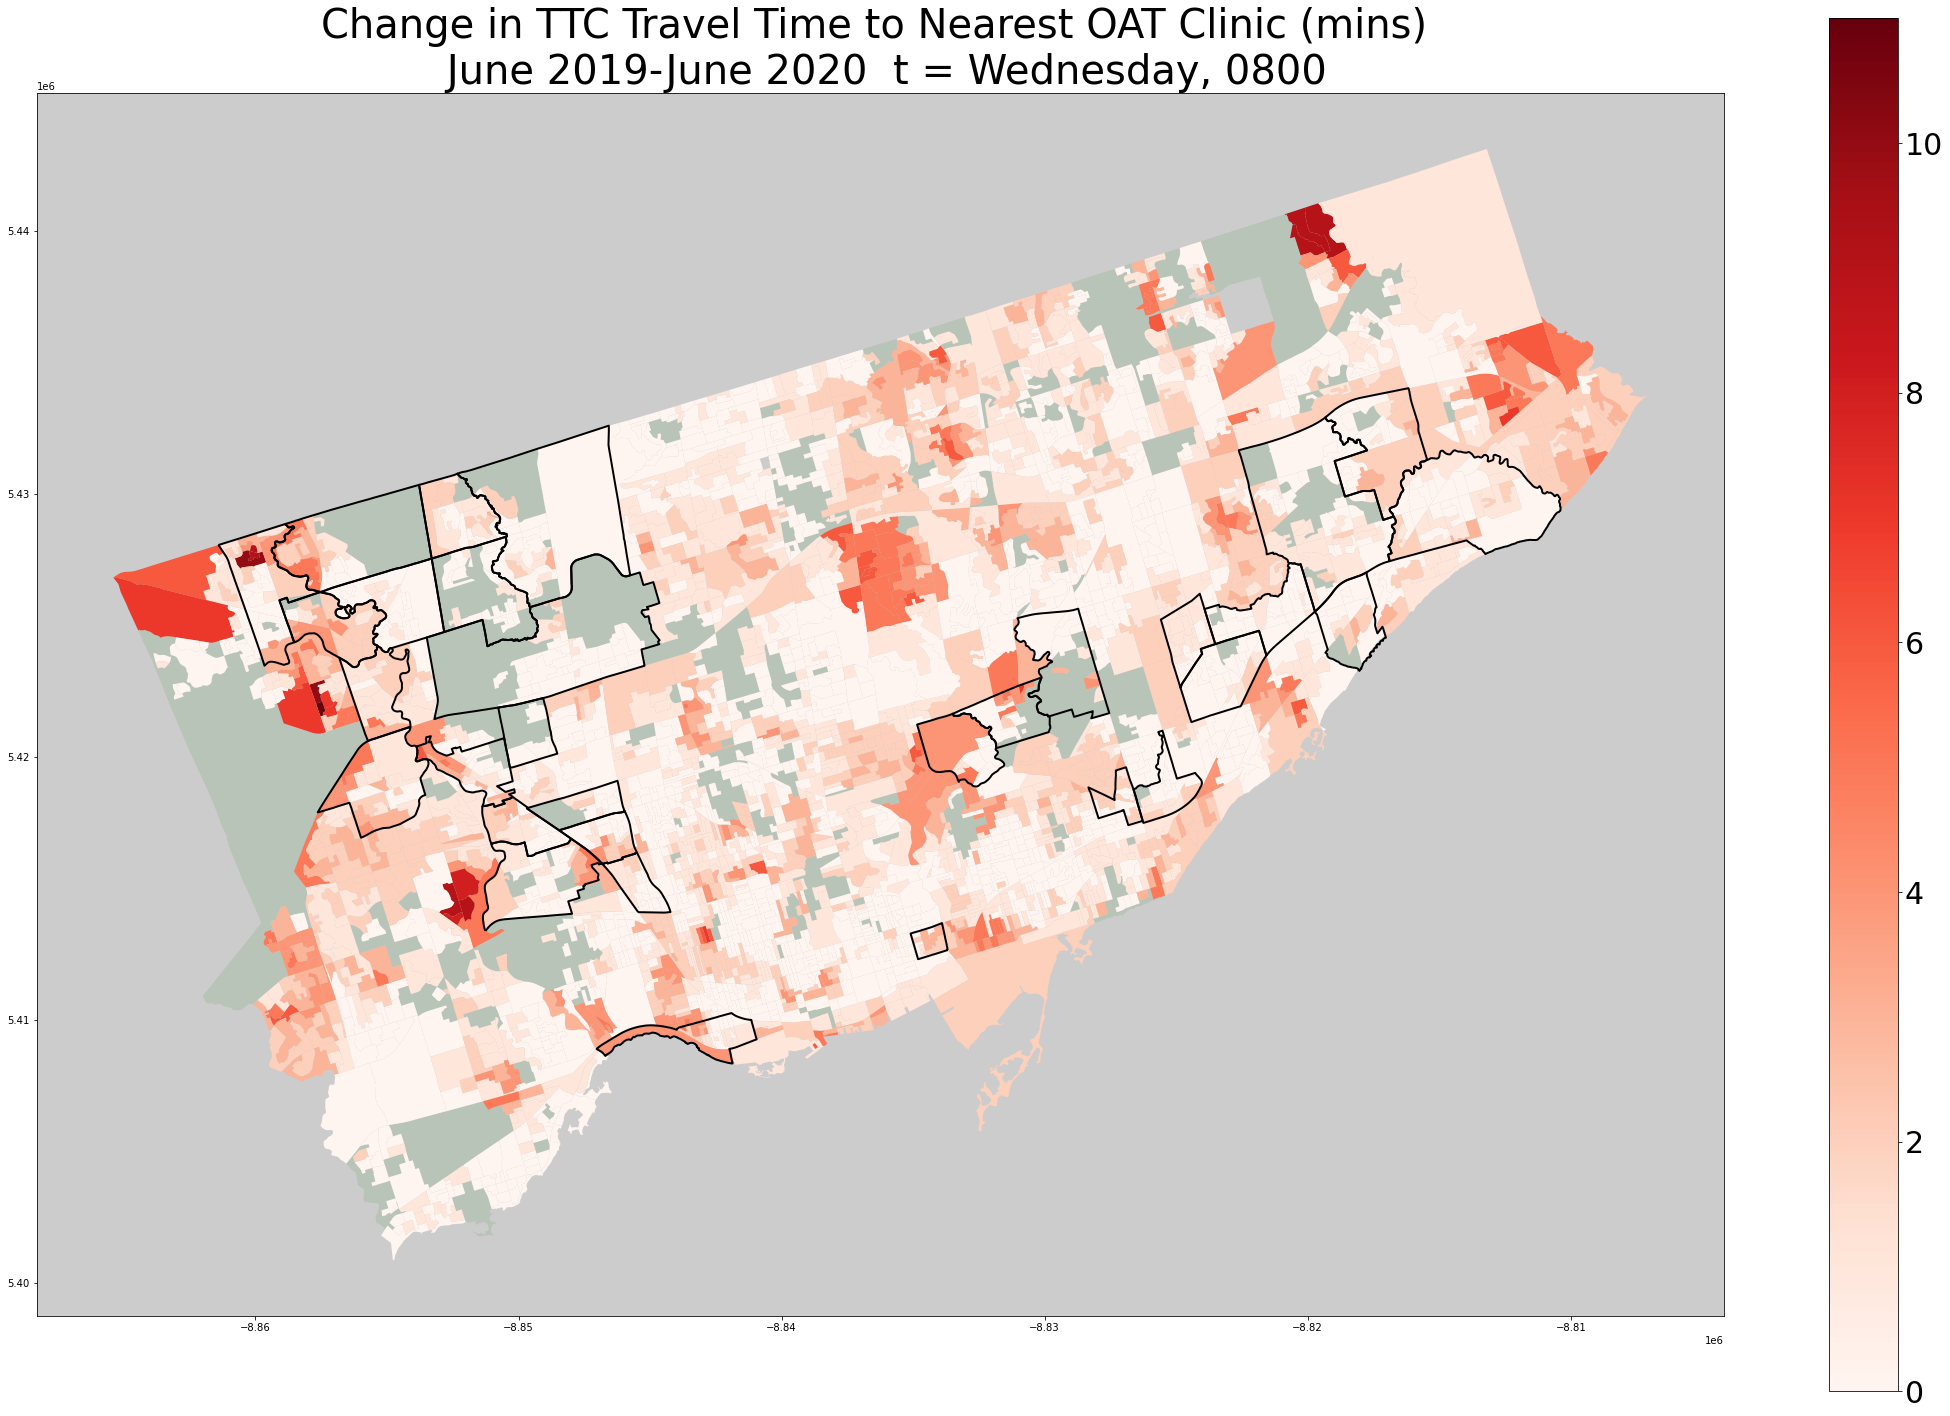

In [290]:
time = '0800'
fig, ax = plt.subplots(figsize=(30, 20))
travel_diff_dic[time][travel_diff_dic[time]['neg_access']==0].plot(column='diff', ax=ax, legend=True, color='green', alpha=0.1)
travel_diff_dic[time][travel_diff_dic[time]['neg_access']==1].plot(column='diff', ax=ax, cmap='Reds', legend=True)
#ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
NIA.plot(facecolor='none', edgecolor='black', linewidth=2, ax=ax)
cb_ax = fig.axes[1]
ax.patch.set_facecolor('black')
ax.patch.set_alpha(0.2)
plt.title(f"Change in TTC Travel Time to Nearest OAT Clinic (mins) \n June 2019-June 2020  t = Wednesday, 0800", fontsize=40)
cb_ax.tick_params(labelsize=30)
plt.tight_layout()
plt.savefig(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/imgs_2/{time}.png')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


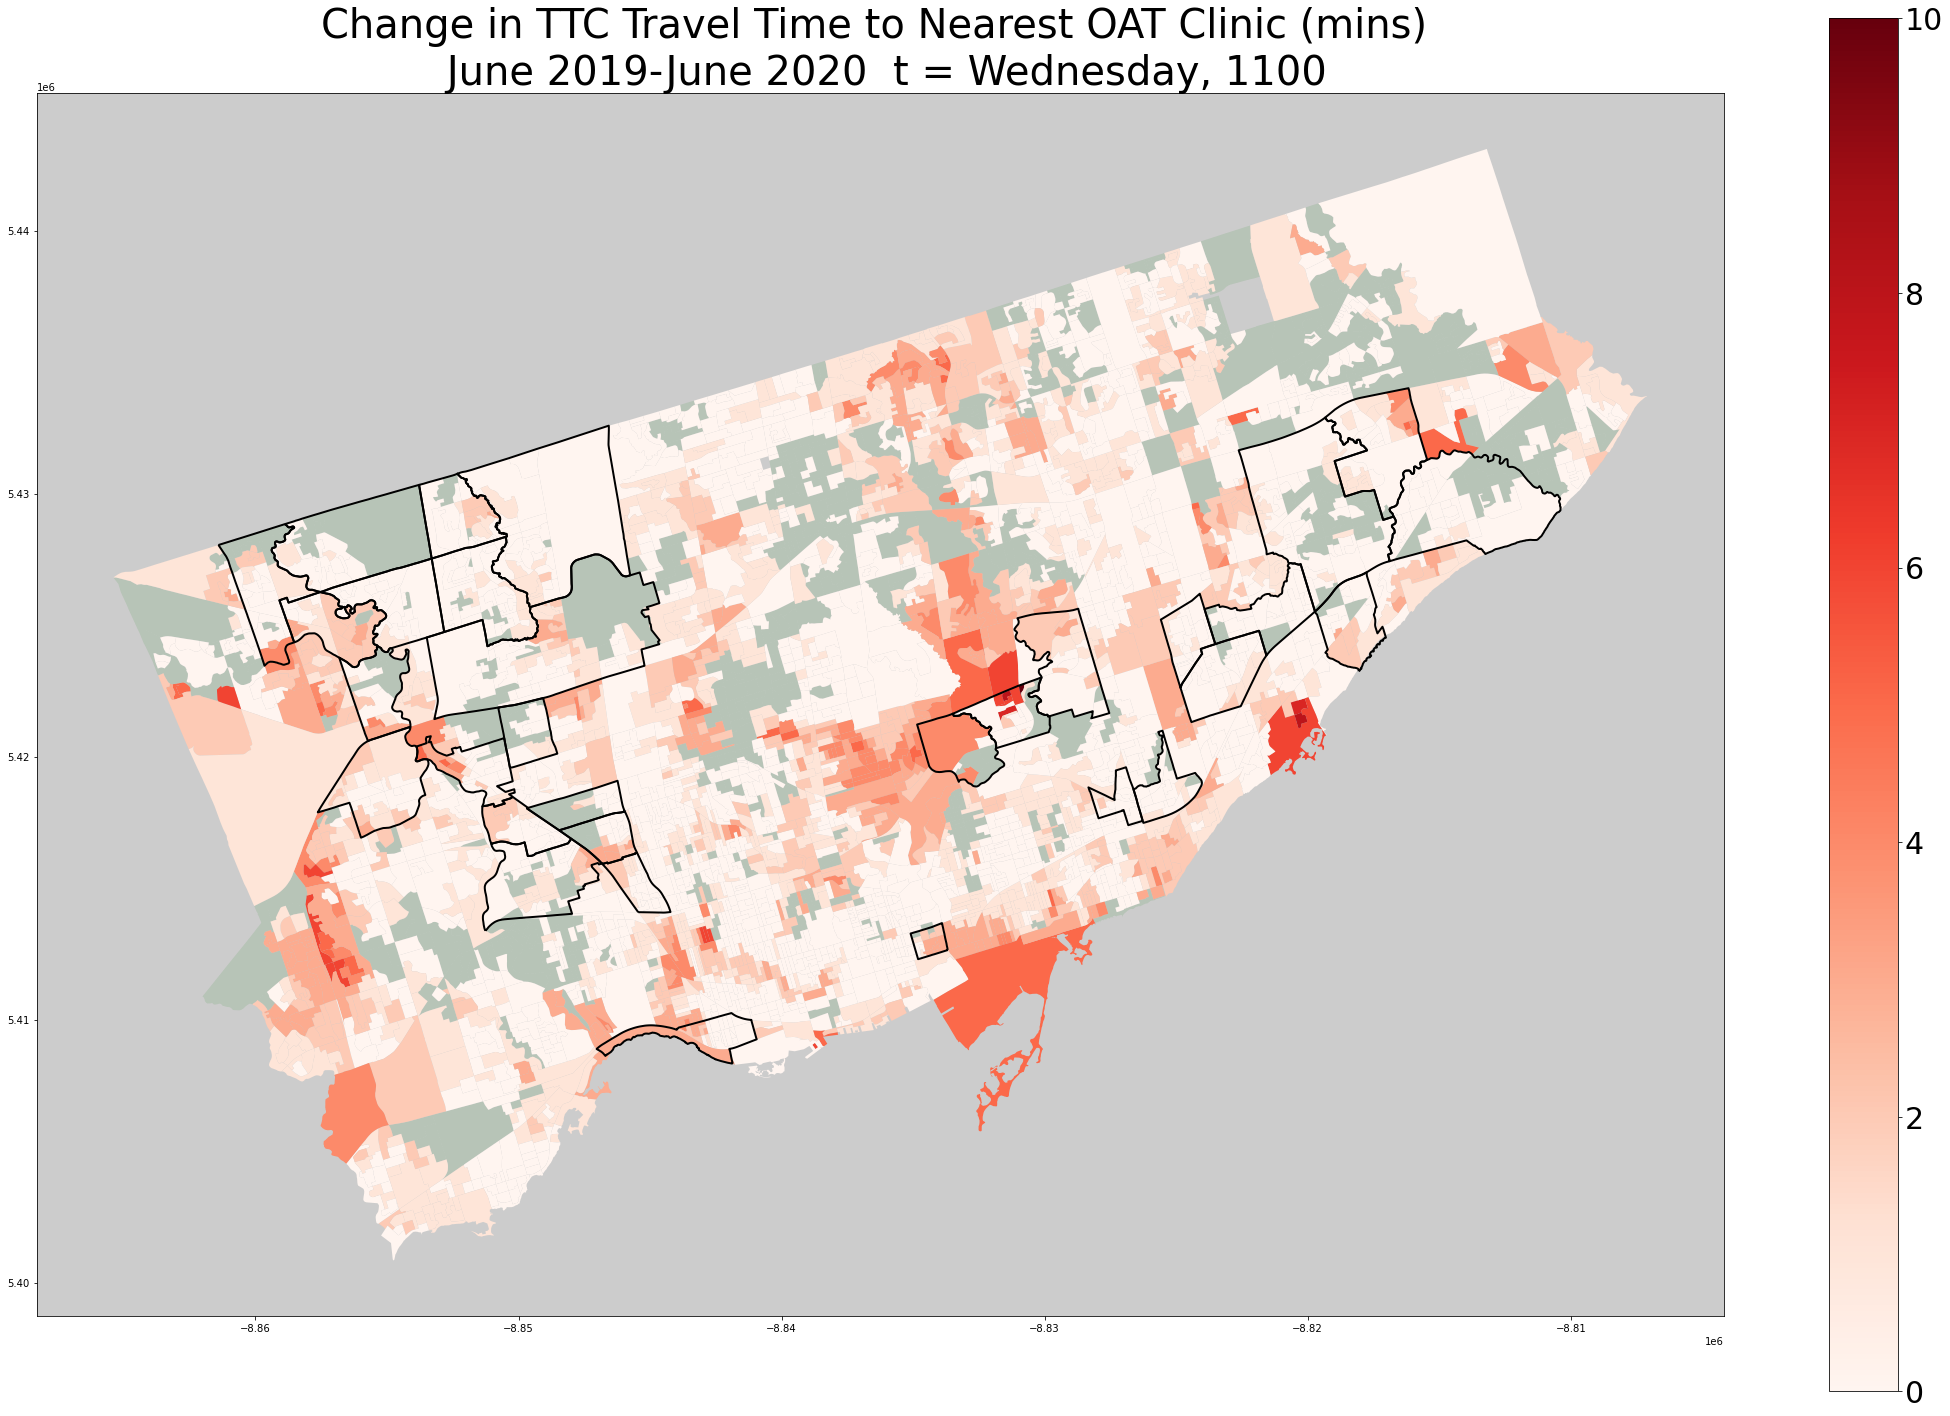

In [291]:
time = '1100'
fig, ax = plt.subplots(figsize=(30, 20))
travel_diff_dic[time][travel_diff_dic[time]['neg_access']==0].plot(column='diff', ax=ax, legend=True, color='green', alpha=0.1)
travel_diff_dic[time][travel_diff_dic[time]['neg_access']==1].plot(column='diff', ax=ax, cmap='Reds', legend=True)
#ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
NIA.plot(facecolor='none', edgecolor='black', linewidth=2, ax=ax)
cb_ax = fig.axes[1]
ax.patch.set_facecolor('black')
ax.patch.set_alpha(0.2)
plt.title(f"Change in TTC Travel Time to Nearest OAT Clinic (mins) \n June 2019-June 2020  t = Wednesday, {time}", fontsize=40)
cb_ax.tick_params(labelsize=30)
plt.tight_layout()
plt.savefig(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/imgs_2/{time}.png')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


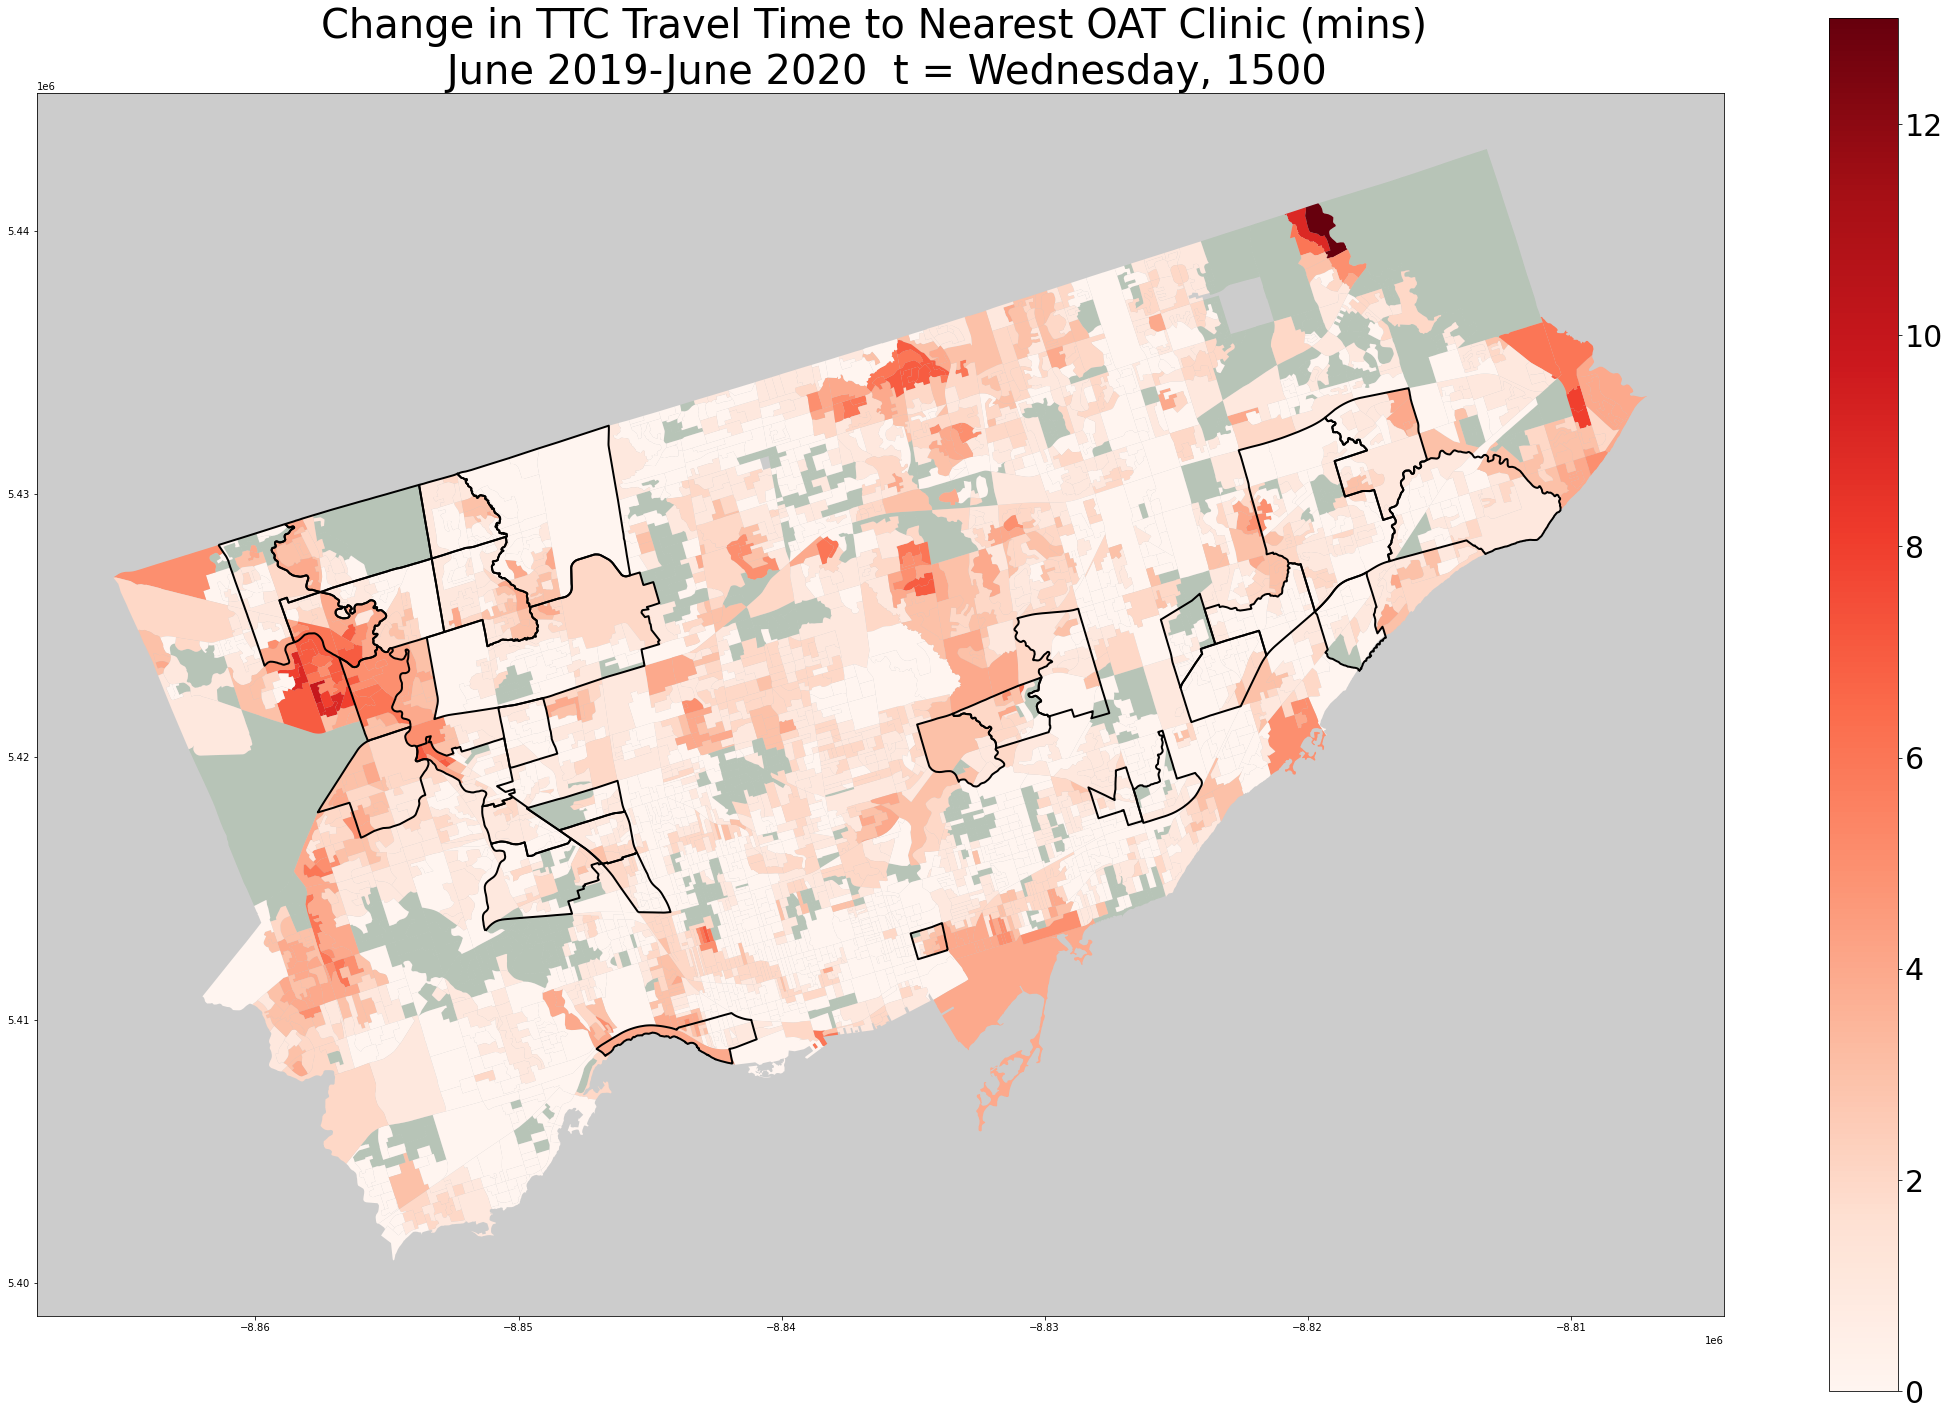

In [292]:
time = '1500'
fig, ax = plt.subplots(figsize=(30, 20))
travel_diff_dic[time][travel_diff_dic[time]['neg_access']==0].plot(column='diff', ax=ax, legend=True, color='green', alpha=0.1)
travel_diff_dic[time][travel_diff_dic[time]['neg_access']==1].plot(column='diff', ax=ax, cmap='Reds', legend=True)
#ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
NIA.plot(facecolor='none', edgecolor='black', linewidth=2, ax=ax)
cb_ax = fig.axes[1]
ax.patch.set_facecolor('black')
ax.patch.set_alpha(0.2)
plt.title(f"Change in TTC Travel Time to Nearest OAT Clinic (mins) \n June 2019-June 2020  t = Wednesday, {time}", fontsize=40)
cb_ax.tick_params(labelsize=30)
plt.tight_layout()
plt.savefig(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/imgs_2/{time}.png')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


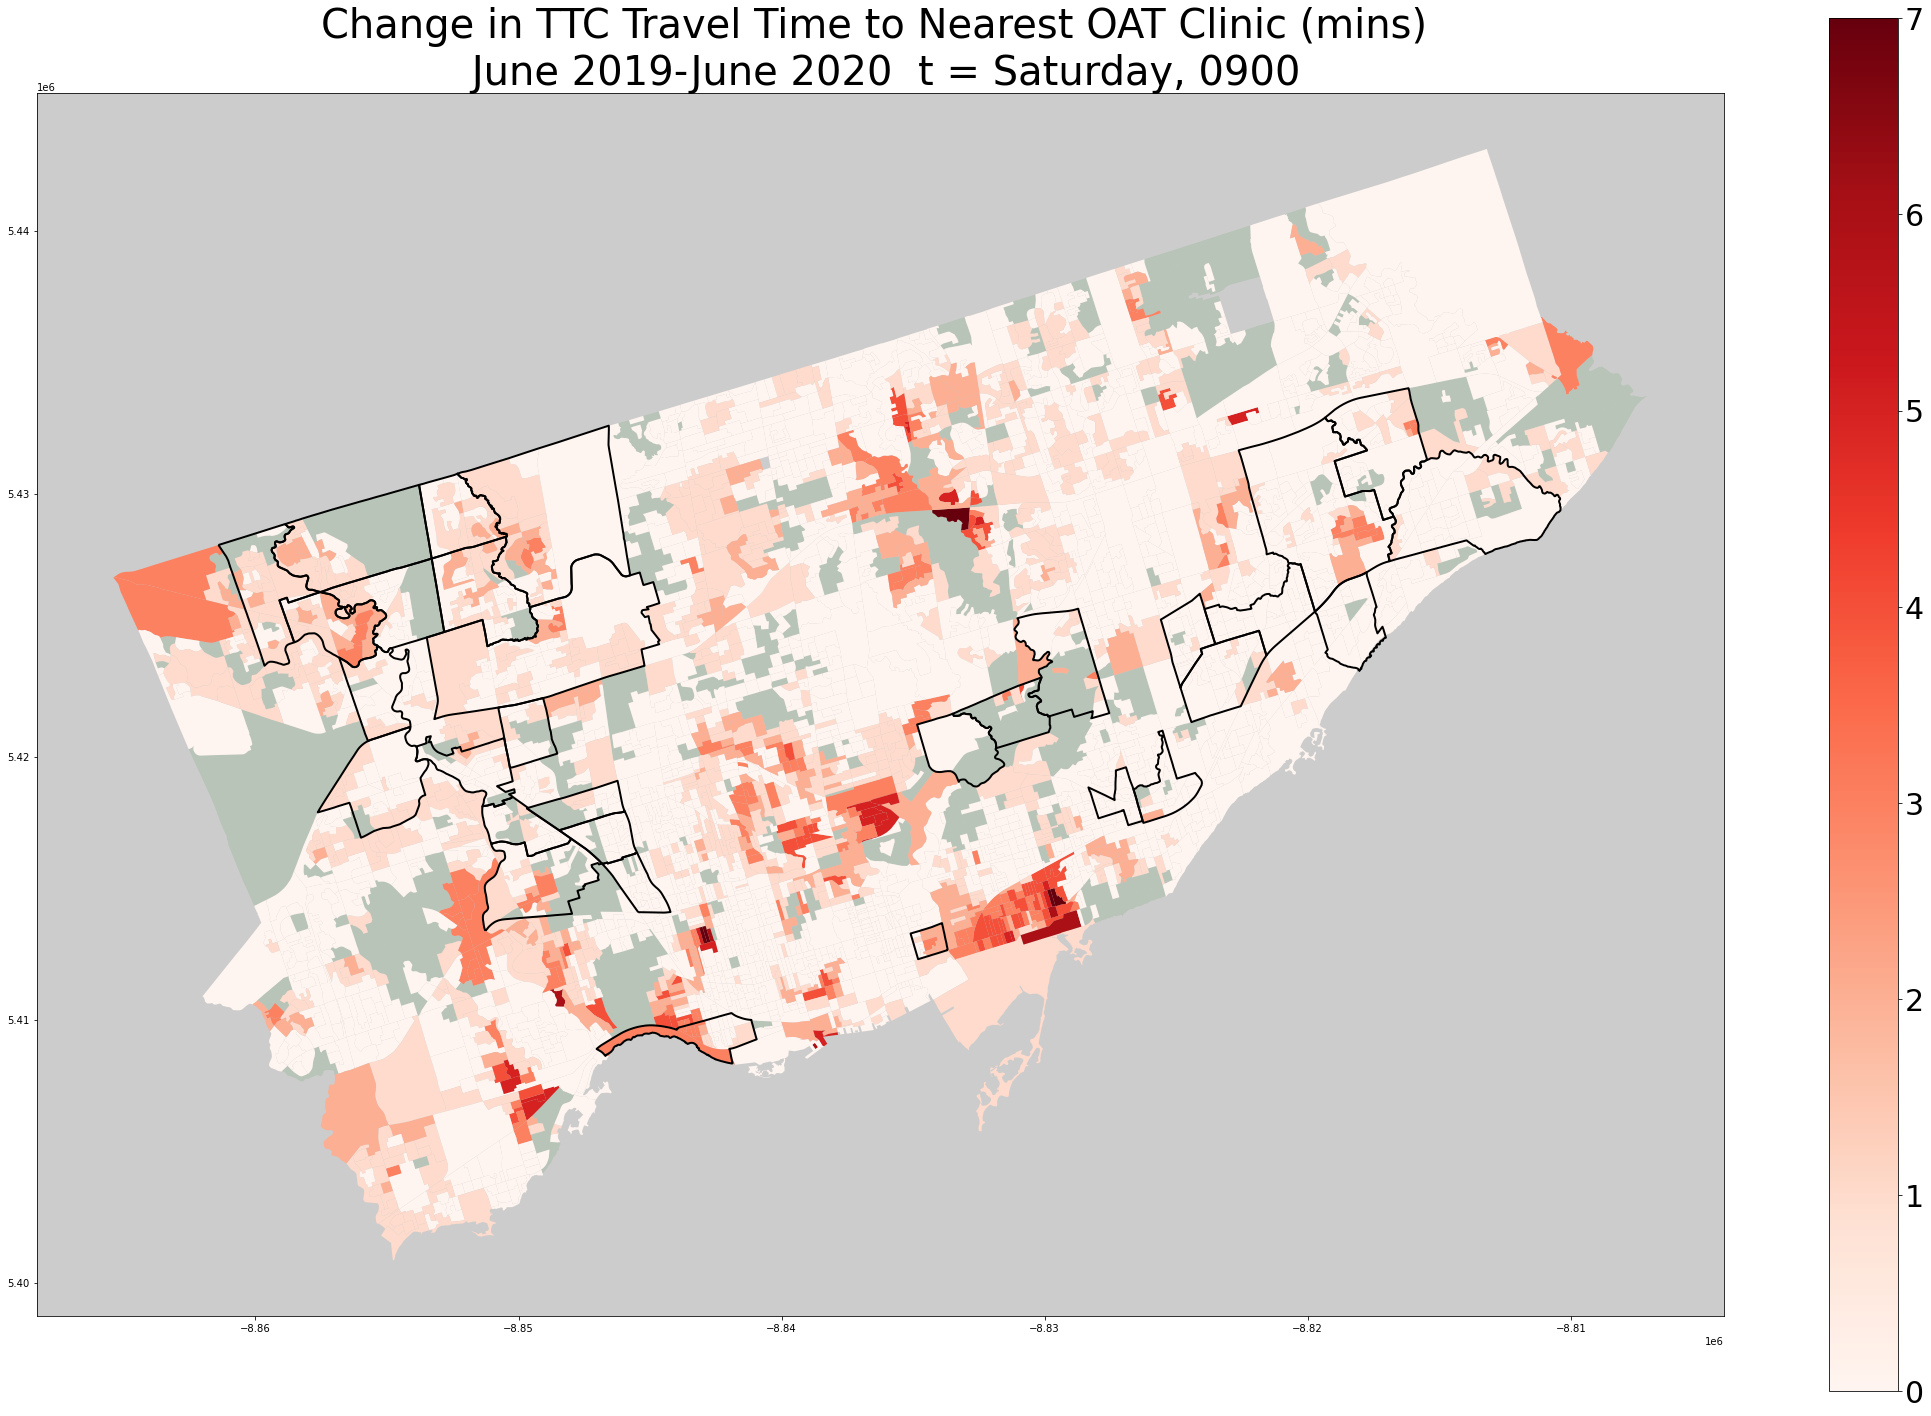

In [293]:
time = '0900_sat'
fig, ax = plt.subplots(figsize=(30, 20))
travel_diff_dic[time][travel_diff_dic[time]['neg_access']==0].plot(column='diff', ax=ax, legend=True, color='green', alpha=0.1)
travel_diff_dic[time][travel_diff_dic[time]['neg_access']==1].plot(column='diff', ax=ax, cmap='Reds', legend=True)
#ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
NIA.plot(facecolor='none', edgecolor='black', linewidth=2, ax=ax)
cb_ax = fig.axes[1]
ax.patch.set_facecolor('black')
ax.patch.set_alpha(0.2)
plt.title(f"Change in TTC Travel Time to Nearest OAT Clinic (mins) \n June 2019-June 2020  t = Saturday, 0900", fontsize=40)
cb_ax.tick_params(labelsize=30)
plt.tight_layout()
plt.savefig(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/opioid_accessibility/data/toronto_data/imgs_2/{time}.png')